In [1]:
import numpy as np

def generate_random_initial_configuration(length, num_configs):
    return np.random.randint(2, size=(num_configs, length))

def generate_random_initial_configuration_prob(length, num_configs, p=0.5):
    return np.random.choice([0, 1], size=(num_configs, length), p=[p,1.0-p])


In [2]:
N = 23
num_conf = 50000

set1 = generate_random_initial_configuration(N, num_conf)

set2 = generate_random_initial_configuration_prob(N, num_conf, 0.3)

In [3]:
from scipy.spatial.distance import pdist

def calculate_statistics(configurations):
     mean_proportion_1s = np.mean(configurations)
     std_dev_proportion_1s = np.std(np.mean(configurations, axis=1))
     hamming_distances = pdist(configurations, 'hamming') * configurations.shape[1]
     average_hamming_distance = np.mean(hamming_distances)
     
     return {
        "Mean Proportion of 1s": mean_proportion_1s,
        "Standard Deviation of Proportion of 1s": std_dev_proportion_1s,
        "Average Hamming Distance": average_hamming_distance
     }
     

In [4]:
print(calculate_statistics(set1))
print(calculate_statistics(set2))

{'Mean Proportion of 1s': 0.5004773913043479, 'Standard Deviation of Proportion of 1s': 0.10494178275891847, 'Average Hamming Distance': 11.500015852317047}
{'Mean Proportion of 1s': 0.7001365217391304, 'Standard Deviation of Proportion of 1s': 0.09560297292322051, 'Average Hamming Distance': 9.657506630932618}


In [5]:

def count_unique_configurations(configurations):
    unique_configs = np.unique(configurations, axis=0)
    
    num_unique_configs = unique_configs.shape[0]
    
    return num_unique_configs

In [6]:
u1 = count_unique_configurations(set1)
u2 = count_unique_configurations(set2)
print(u1/num_conf)
print(u2/num_conf)

0.99742
0.93342


In [7]:
def configuration_to_int(config):
    return int("".join(config.astype(str)), 2)

def minimize_shift(config):
    min_val = configuration_to_int(config)
    min_config = config.copy()
    for shift in range(1, len(config)):
        shifted_config = np.roll(config, shift)
        shifted_val = configuration_to_int(shifted_config)
        if shifted_val < min_val:
            min_val = shifted_val
            min_config = shifted_config
    return min_config

def find_unique_minimized_configurations(configurations):
    minimized_configs = np.array([minimize_shift(config) for config in configurations])
    minimized_ints = np.array([configuration_to_int(config) for config in minimized_configs])
    unique_indices = np.unique(minimized_ints, return_index=True)[1]
    return minimized_configs[unique_indices]

In [8]:
shift_set1 = find_unique_minimized_configurations(set1)
shift_set2 = find_unique_minimized_configurations(set2)

print(shift_set1.shape[0] / num_conf)
print(shift_set2.shape[0] / num_conf)

0.935
0.58282


In [9]:
import matplotlib.pyplot as plt

def density_histogram(configurations):
    densities = np.sum(configurations, axis=1) / configurations.shape[1]

    plt.hist(densities, bins='auto', alpha=0.75, rwidth=0.85)
    plt.title('Histogram of Densities')
    plt.xlabel('Density (Proportion of 1s)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    
    plt.show()

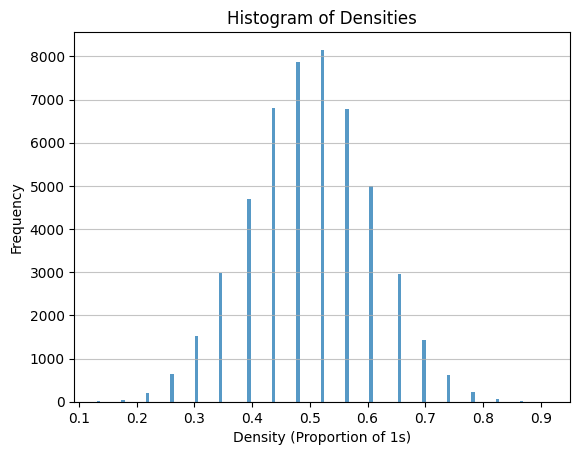

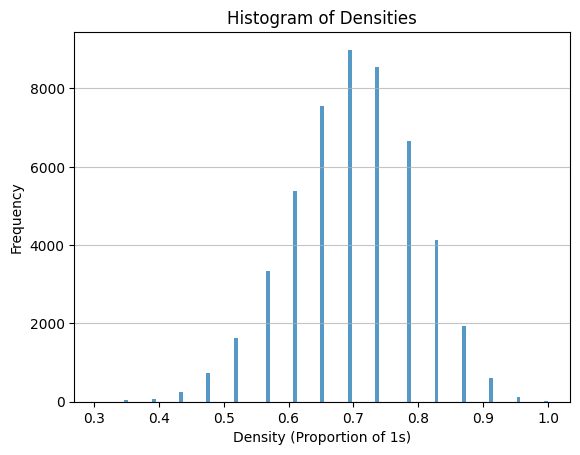

In [10]:
density_histogram(set1)
density_histogram(set2)


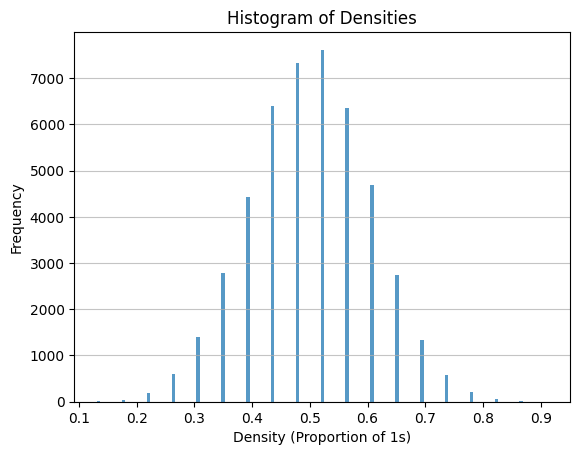

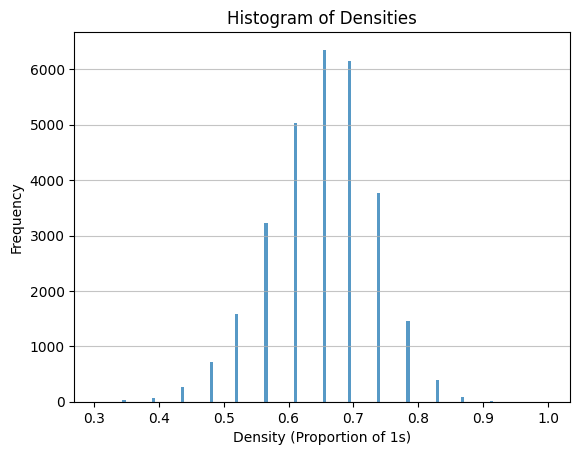

In [11]:
density_histogram(shift_set1)
density_histogram(shift_set2)